# Activation Functions in Keras

**Description:** In this notebook, we will have a quick look at the most used activation functions, how we use them in Keras as well as train a model using those functions and comparing their results. 

#Imports

In [1]:
import os
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras

import matplotlib.pyplot as plt

In [2]:
#@title Parameters
BATCH_SIZE =  128 #@param {type:"slider", min:32, max:1024, step:32}
EPOCHS = 30 #@param {type:"integer"}
SEED = 1337 #@param {type:"integer"}

# This function is taken from the following notebook
# https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb
def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

def plot_func_and_derivative(func,
                             label,
                             y_range,
                             y_diff_range,
                             centre = [0,0]):
    z = np.linspace(-5, 5, 200)

    plt.figure(figsize=(11,4))

    plt.subplot(121)

    plt.plot(z, func(z), "b-", linewidth=2, label=label)
    plt.plot([-5, 5], [centre[0], centre[1]], 'k-')
    plt.plot([0, 0], [y_range[0], y_range[1]], 'k-')
    plt.grid(True)
    plt.legend(loc="best", fontsize=14)
    plt.title("Activation function", fontsize=14)
    plt.axis([-5, 5, y_range[0], y_range[1]])

    plt.subplot(122)
    plt.plot(z, derivative(func, z), "b-", linewidth=2, label=label + '\'')
    plt.grid(True)
    plt.legend(loc="best", fontsize=14)
    plt.title("Derivative", fontsize=14)
    plt.axis([-5, 5, y_diff_range[0], y_diff_range[1]])

    plt.show()

def reset_random_seed(seed=1337):
    np.random.seed(seed)
    tf.random.set_seed(seed)

reset_random_seed(SEED)

# Activation Functions in Keras

There are many activation functions that can be used while creating your model. You can check the full list on [Keras Activation Layers](https://keras.io/api/layers/activations)

Let's look at some of them


## Output Layer Activation

### Sigmoid

`Sigmoid` is the activation function that was very used in the past until `2010` when `ReLU` was introduced. 

\begin{align}
sigmoid(z) = \frac{1}{1 + e^{-z}}\\
sigmoid'(z) = \frac{e^{-z}}{(1 + e^{-z})^2}
\end{align}


Sigmoid is nowadays used in the output layer when for binary classifications

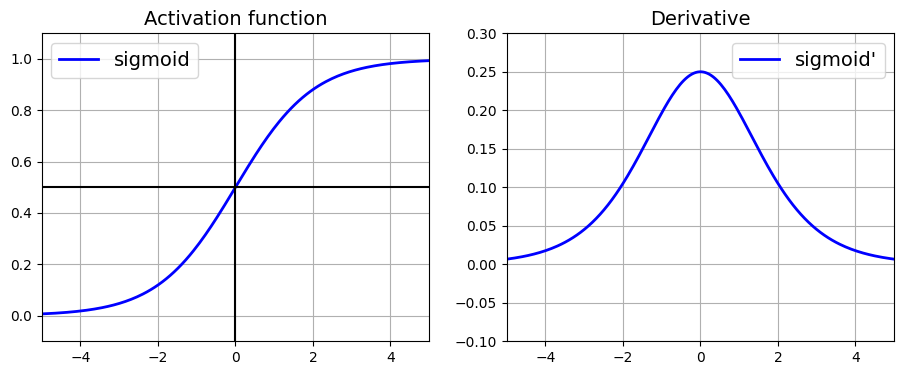

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

plot_func_and_derivative(sigmoid, "sigmoid", [-0.1, 1.1], [-.1, .3], centre=[.5, .5])

### Softmax

`Softmax` is an activation function that is used for the output layer for multi-class classification problem.

\begin{align}
softmax(z_{i}) = \frac{e^{x_{i}}}{\sum_{j=0}^n e^{x_{j}}}\\
\end{align}

In fact the `softmax` function outputs the probability for each of the output classes.   


## Hidden Layer Activation

### tanh

\begin{align}
tanh(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}\\
tanh'(z) = \frac{4}{(e^{z} + e^{-z})^2}
\end{align}

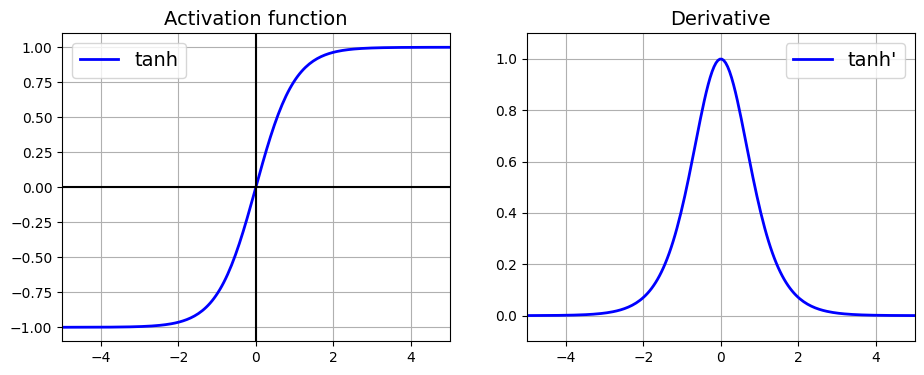

In [4]:
plot_func_and_derivative(np.tanh, "tanh", [-1.1, 1.1], [-.1, 1.1])

### ReLU

\begin{align}
ReLU(z) = max(0, z)\\
ReLU'(z) =
\begin{cases}
0&\text{if z $\lt$ 0}\\
1&\text{if z $\gt$ 0}\\
\end{cases}
\end{align}

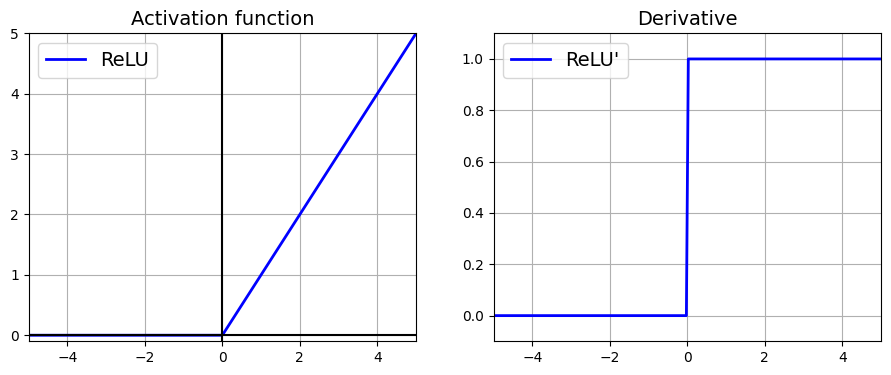

In [5]:
def relu(z):
    return np.maximum(0, z)

plot_func_and_derivative(relu, "ReLU", [-.1, 5], [-.1, 1.1])

### LeakyReLU

\begin{align}
LeakyReLU_{α}(z) = max(αz, z)\\
LeakyReLU'_{α}(z) =
\begin{cases}
α&\text{if z $\lt$ 0}\\
1&\text{if z $\gt$ 0}\\
\end{cases}
\end{align}

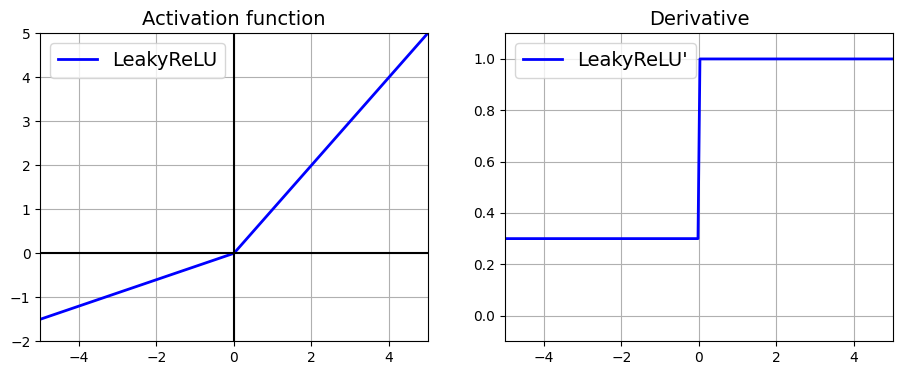

In [6]:
def leaky_relu(z, alpha=0.3):
    return np.maximum(alpha * z, z)


plot_func_and_derivative(leaky_relu, "LeakyReLU", [-2, 5], [-.1, 1.1])

### ELU

\begin{align}
ELU_{α}(z) =
\begin{cases}
α(e^{z} - 1)&\text{if z $\lt$ 0}\\
z&\text{if z $\ge$ 0}\\
\end{cases}\\
ELU'_{α}(z) =
\begin{cases}
αe^{z}&\text{if z $\lt$ 0}\\
1&\text{if z $\ge$ 0}\\
\end{cases}
\end{align}

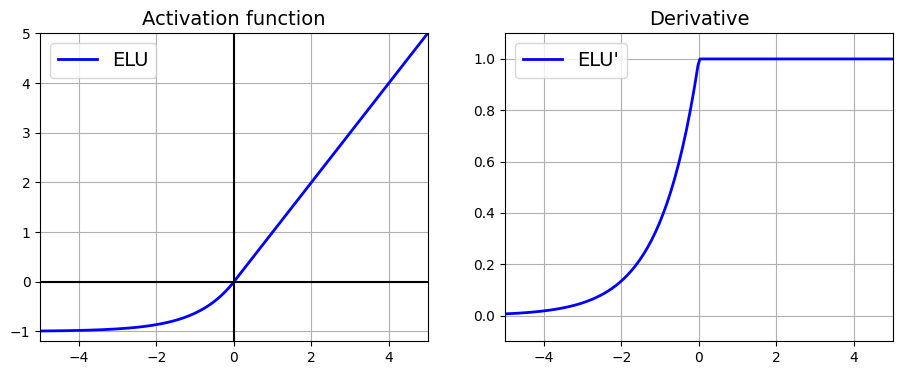

In [7]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

plot_func_and_derivative(elu, "ELU", [-1.2, 5], [-.1, 1.1])

### SELU

\begin{align}
SELU_{α, λ}(z) = λ
\begin{cases}
α(e^{z} - 1)&\text{if z $\lt$ 0}\\
z&\text{if z $\ge$ 0}\\
\end{cases}\\
SELU'_{α}(z) = λ
\begin{cases}
αe^{z}&\text{if z $\lt$ 0}\\
1&\text{if z $\ge$ 0}\\
\end{cases}
\end{align}

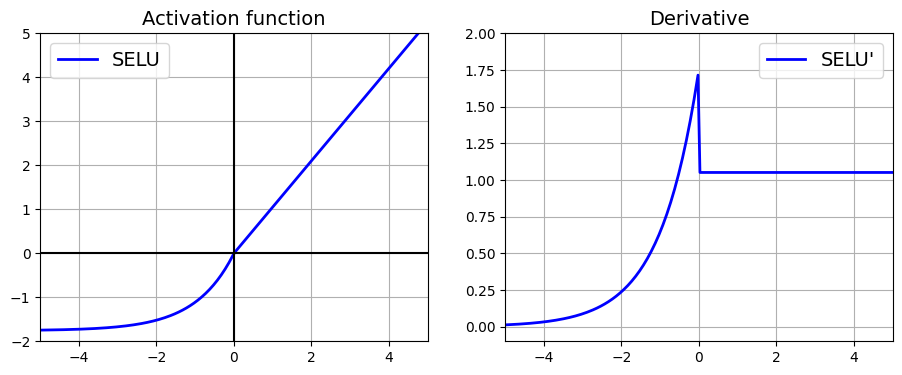

In [8]:
def selu(z, alpha=1.673, l=1.051):
    return l * np.where(z < 0, alpha * (np.exp(z) - 1), z)

plot_func_and_derivative(selu, "SELU", [-2, 5], [-.1, 2.])

# How are activation functions used in Keras

In Keras, there are 4 ways to use an activation function:

##### **Option 1:** By setting the activation argument when defining a layer
> `keras.layers.Dense(10, activation="elu")(x)`


##### **Option 2:** By calling the specific activation **function** after the layer
> `keras.layers.Dense(10)(x)`  
> `keras.activations.elu(x, alpha=1.0`)

##### **Option 3:** By calling the specific activation **layer** after the linear layer 
Check [Keras Activation Layers](https://keras.io/api/layers/activation_layers/) for the list.   
> `keras.layers.Dense(10)(x)`   
> `keras.layers.ELU(alpha=1.0)(x)`   

##### **Option 4:** By calling the layer Activation and specifying the desired function as an argument
> `keras.layers.Dense(10)(x)`   
> `keras.layers.Activation("elu")(x)`

Let's check that all those options are equivalent.
We'll test it on ELU

In [9]:
# Create an input tensor
x = tf.random.normal((100,), seed=SEED)

# Reset seed in order to have the same Dense layer weights
reset_random_seed(SEED)



### Option 1 ### 

# Create a Dense layer setting the activation argument
y1 = keras.layers.Dense(10,
                        kernel_initializer=keras.initializers.HeNormal(seed=SEED),
                        activation="elu")(tf.reshape(x, (1, x.shape[0])))

# Reset seed in order to have the same Dense layer weights
reset_random_seed(SEED)



### Option 2 ### 

# Create a Dense layer without setting the activation argument
y2 = keras.layers.Dense(10,
                        kernel_initializer=keras.initializers.HeNormal(seed=SEED)
                        )(tf.reshape(x, (1, x.shape[0])))

# Apply the corresponding activation function to the output of the Dense layer
y2 = keras.activations.elu(y2)

reset_random_seed(SEED)



### Option 3 ### 

# Create a Dense layer without setting the activation argument
y3 = keras.layers.Dense(10,
                        kernel_initializer=keras.initializers.HeNormal(seed=SEED)
                        )(tf.reshape(x, (1, x.shape[0])))

# Call the corresponding activation layer
y3 = keras.layers.ELU()(y3)

reset_random_seed(SEED)



### Option 4 ###

# Create a Dense layer without setting the activation argument
y4 = keras.layers.Dense(10,
                        kernel_initializer=keras.initializers.HeNormal(seed=SEED)
                        )(tf.reshape(x, (1, x.shape[0])))

# Call the keras.layers.Activation
y4 = keras.layers.Activation("elu")(y4)

# Finally, let's ensure that all those output tensors are equal
tf.debugging.assert_equal(y1, y2)
tf.debugging.assert_equal(y1, y3)
tf.debugging.assert_equal(y1, y4)

print("The above 4 methods for activation give the same output for the same input")

The above 4 methods for activation give the same output for the same input


Or if we need to set the hyperparameter alpha to a value different than the default one, options 2 and 3 can be used and are equivalent

In [10]:
# Create an input tensor
x = tf.random.normal((100,), seed=SEED)

# Reset seed in order to have the same Dense layer weights
reset_random_seed(SEED)


### Option 2 ### 

# Create a Dense layer without setting the activation argument
y2 = keras.layers.Dense(10,
                        kernel_initializer=keras.initializers.HeNormal(seed=SEED)
                        )(tf.reshape(x, (1, x.shape[0])))

# Apply the corresponding activation function to the output of the Dense layer
y2 = keras.activations.elu(y2, alpha=.77)

reset_random_seed(SEED)



### Option 3 ### 

# Create a Dense layer without setting the activation argument
y3 = keras.layers.Dense(10,
                        kernel_initializer=keras.initializers.HeNormal(seed=SEED)
                        )(tf.reshape(x, (1, x.shape[0])))

# Call the corresponding activation layer
y3 = keras.layers.ELU(alpha=.77)(y3)

reset_random_seed(SEED)

# Finally, let's ensure that all those output tensors are equal
tf.debugging.assert_equal(y2, y3)

print("Activation give the same output for the same input")

Activation give the same output for the same input


As we saw, all those different methods of defining the activation are the same. So the question is, when to use each of these?



## When should we use each of these?

In most of the cases especially when there is no hyperparameters or we want to use the default one **and** the activation function is directly applied after the linear transformation, **use option 1**

In case we need to set a hyperparamater to a value different than the default one, we can **use options 2 or 3**

In some other cases, we would want to separate the linear transformation from the activation one in order to apply some other transformation in between. In this case, we can **use options 2, 3 or 4**   
An example for this would be to apply BatchNormalization before the activation.
> `keras.layers.Dense(10, use_bias=False)`   
> `keras.layers.BatchNormalization()`   
> `keras.layers.ELU()`   

# When to use which activation function?

As stated by Aurélien Geron in his book [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems 2nd Edition](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1492032646/ref=sr_1_1?keywords=aurelien+geron&qid=1642253454&sprefix=aurelien+geron%2Caps%2C238&sr=8-1), the rule to choosing what activation function to use in the hidden layer is as following:   
SELU > ELU > Leaky ReLU (and its variants) > ReLU > tanh > sigmoid



*   If the network’s architecture prevents it from self-normalising, **use ELU**
*   If you care a lot about runtime latency, **use LeakyReLU**
*   If you have time and computing power and your network is overfitting, **use RReLU**
*   If you have time and computing power and you have a huge training set, **use PReLU**

ReLU might still be the best choice since it is widely used and many libraries and hadware accelerator provide ReLU-specific optimisations.

# Compare Activations

Let's now try to compare the activation functions performance on the MNIST dataset.

We will apply preprocessing on the dataset in order to:
*   Rescale by dividing by 255 since the input features are greyscale images
*   Normalise the input features to have a mean of 0 and variance of 1



## Dataset

In [11]:
(train_ds, valid_ds), info = tfds.load('mnist',
                                       split=['train', 'test'], 
                                       shuffle_files=True,
                                       with_info=True,
                                       as_supervised=True
                                       )

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [12]:
def preprocess_features(x):
    x = keras.layers.Rescaling(scale=1./255)(x)
    x = keras.layers.Normalization(mean=0., variance=1.)(x)

    return x

def preprocess_ds(ds, batchsize = 64):
    # Preprocess input features
    ds = ds.map(lambda x, y: (preprocess_features(x), y),
                num_parallel_calls=tf.data.AUTOTUNE)

    # Cache features for faster retrieval
    ds = ds.cache()

    # Create batches
    ds = ds.batch(batchsize)
    
    # Call prefetch which allows subsequent elements to be prepared while the current
    # elements are being processed
    ds = ds.prefetch(tf.data.AUTOTUNE)

    return ds

In [13]:
train_ds = preprocess_ds(train_ds, batchsize=BATCH_SIZE)
valid_ds = preprocess_ds(valid_ds, batchsize=BATCH_SIZE)

## Models Creation and Training

We will create a model with 3 hidden layers and will run the model several times changing the hidden layers activation function each time (and the kernel initialiser as well).

We will talk about the initialiser and why we changed them in a different tutorial.

In [14]:
def build_model(activation, kernel_initializer = 'he_normal'):
    inputs = keras.layers.Input(shape=(28, 28, 1))

    x = keras.layers.Flatten(name='flatten')(inputs)
    
    x = keras.layers.Dense(128, activation=activation, kernel_initializer=kernel_initializer)(x)
    x = keras.layers.Dense(64, activation=activation, kernel_initializer=kernel_initializer)(x)
    x = keras.layers.Dense(32, activation=activation, kernel_initializer=kernel_initializer)(x)
    
    outputs = keras.layers.Dense(10, activation="softmax")(x)

    model = keras.Model(inputs, outputs)

    model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    return model

In [15]:
# Directory where TensorBoard logs will be saved
tb_logdir = os.path.join(os.curdir, "tb_logs")

In [16]:
# The list of activation functions and their corresponding initialisers
activations = ['tanh', 'relu', 'leaky_relu', 'elu', 'selu']
initialisers = ['glorot_normal', 'he_normal', 'he_normal', 'he_normal', 'lecun_normal']

In [17]:
# For every model training, we will add the training history to the list in order to
# display those later
history_list = []

for activation, initialiser in zip(activations, initialisers):
    # Clear session
    keras.backend.clear_session()

    # Build and compile the model
    model = build_model(activation)

    # Initialise TensorBoard
    tensorboard_cb = keras.callbacks.TensorBoard(os.path.join(tb_logdir, activation))

    # Train the model
    print(f"Running model with hidden layers' activation = {activation} & initialiser = {initialiser}")
    history = model.fit(train_ds,
                        epochs=EPOCHS,
                        validation_data=valid_ds,
                        callbacks=[tensorboard_cb])
    
    # Append history
    history_list.append(history)

Running model with hidden layers' activation = tanh & initialiser = glorot_normal
Epoch 1/30
469/469 [==============================] - 18s 32ms/step - loss: 1.9706 - accuracy: 0.3667 - val_loss: 1.6042 - val_accuracy: 0.5931
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 1.4366 - accuracy: 0.6457 - val_loss: 1.2662 - val_accuracy: 0.7069
Epoch 3/30
469/469 [==============================] - 3s 7ms/step - loss: 1.1873 - accuracy: 0.7249 - val_loss: 1.0813 - val_accuracy: 0.7551
Epoch 4/30
469/469 [==============================] - 3s 5ms/step - loss: 1.0364 - accuracy: 0.7649 - val_loss: 0.9585 - val_accuracy: 0.7865
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.9307 - accuracy: 0.7920 - val_loss: 0.8683 - val_accuracy: 0.8106
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.8509 - accuracy: 0.8110 - val_loss: 0.7982 - val_accuracy: 0.8278
Epoch 7/30
469/469 [==============================] - 3s 6ms/ste

## Results

### Loss and Accuracy Plot

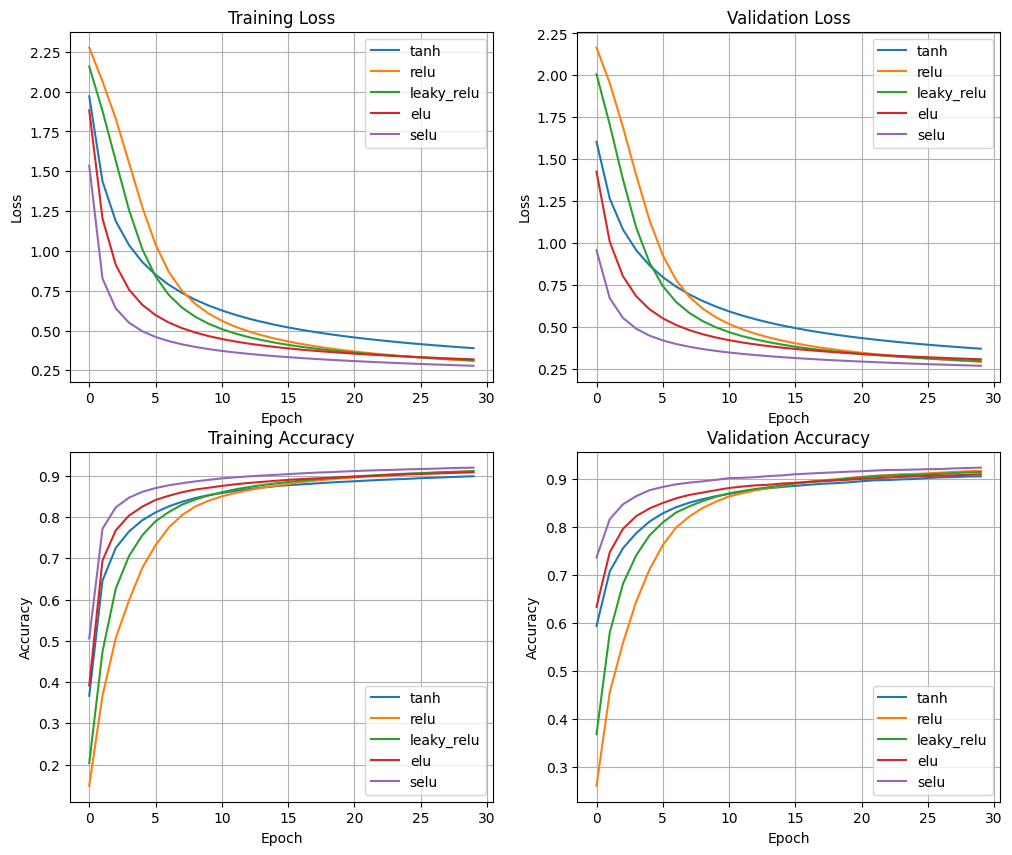

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for history, name in zip(history_list, activations):
    axs[0,0].plot(history.history['loss'], label=f"{name}")
    axs[0,1].plot(history.history['val_loss'], label=name)
    axs[1,0].plot(history.history['accuracy'], label=name)
    axs[1,1].plot(history.history['val_accuracy'], label=name)

axs[0,0].set_title('Training Loss')
axs[0,0].set_ylabel('Loss')
axs[0,0].set_xlabel('Epoch')
axs[0,0].legend(loc='best')
axs[0,0].grid()

axs[0,1].set_title('Validation Loss')
axs[0,1].set_ylabel('Loss')
axs[0,1].set_xlabel('Epoch')
axs[0,1].legend(loc='best')
axs[0,1].grid()

axs[1,0].set_title('Training Accuracy')
axs[1,0].set_ylabel('Accuracy')
axs[1,0].set_xlabel('Epoch')
axs[1,0].legend(loc='best')
axs[1,0].grid()

axs[1,1].set_title('Validation Accuracy')
axs[1,1].set_ylabel('Accuracy')
axs[1,1].set_xlabel('Epoch')
axs[1,1].legend(loc='best')
axs[1,1].grid()

### TensorBoard

In [19]:
%load_ext tensorboard
%tensorboard --logdir={tb_logdir} --port=6006

<IPython.core.display.Javascript object>

We can see that `SELU` gives the best results followed by `ELU`

It is important though to remember that SELU requires a network architecture that is able to self normalise. 

# Customised Activation Function

In Keras, we can create our own customised activation function.

**Tip:** We need to make sure to vectorise our activation function implementation and always use TensorFlow operations in order to benefit from TensorFlow Graph features


Let's try to implement our own activation function and train it on the model.   
We will be implementing:

\begin{align}
Activation(z) =
\begin{cases}
tanh(z)&\text{if z $\lt$ 0}\\
\sqrt z&\text{if z $\ge$ 0}\\
\end{cases}\\
\end{align}

In [20]:
def customised_act(z):
    return tf.where(z < 0, tf.math.tanh(z), tf.math.sqrt(z))

keras.backend.clear_session()

# Build and compile the model
model = build_model(customised_act)

# TensorBoard Callback
tensorboard_cb = keras.callbacks.TensorBoard(os.path.join(tb_logdir, "customised_act"))

# Train the model
history = model.fit(train_ds,
                    epochs=EPOCHS,
                    validation_data=valid_ds,
                    callbacks=[tensorboard_cb])

Epoch 1/30
469/469 [==============================] - 5s 9ms/step - loss: 1.8493 - accuracy: 0.4031 - val_loss: 1.3602 - val_accuracy: 0.6452
Epoch 2/30
469/469 [==============================] - 3s 7ms/step - loss: 1.1612 - accuracy: 0.7038 - val_loss: 0.9757 - val_accuracy: 0.7609
Epoch 3/30
469/469 [==============================] - 3s 7ms/step - loss: 0.8993 - accuracy: 0.7806 - val_loss: 0.7982 - val_accuracy: 0.8142
Epoch 4/30
469/469 [==============================] - 3s 7ms/step - loss: 0.7604 - accuracy: 0.8185 - val_loss: 0.6928 - val_accuracy: 0.8392
Epoch 5/30
469/469 [==============================] - 3s 7ms/step - loss: 0.6728 - accuracy: 0.8398 - val_loss: 0.6217 - val_accuracy: 0.8545
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.6116 - accuracy: 0.8547 - val_loss: 0.5697 - val_accuracy: 0.8667
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.5659 - accuracy: 0.8638 - val_loss: 0.5304 - val_accuracy: 0.8743
Epoch 

We can now go back to TensorBoard and see the model's performance.   
It gave a result similar to `ELU`

# References

This notebook has been influenced and has used code found in:

*   [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow - Chapter 10](https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb)
*   [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow - Chapter 11](https://github.com/ageron/handson-ml2/blob/master/11_training_deep_neural_networks.ipynb)

by [Aurélien Geron](https://twitter.com/aureliengeron)

